In [2]:
import pandas as pd

In [4]:
combined_df = pd.read_csv('combined_df.csv')

In [47]:
paris_df = combined_df.loc[combined_df['source'] == 'Paris']

In [53]:
combined_df.columns

Index(['Unnamed: 0', 'IP', 'Loss', 'Snt', 'Last', 'Avg', 'Best', 'Wrst',
       'StDev', 'time', 'hop', 'source', 'route_number', 'email', 'IP_ISP',
       'zip_code', 'time_zone', 'area', 'as', 'city', 'country', 'countryCode',
       'isp', 'lat', 'lon', 'org', 'region', 'regionName', 'status',
       'timezone', 'zip', 'message', 'asn', 'cont_code'],
      dtype='object')

In [4]:
paris_routes = paris_df.groupby('time')

In [5]:
combined_df.columns

Index(['Unnamed: 0', 'IP', 'Loss', 'Snt', 'Last', 'Avg', 'Best', 'Wrst',
       'StDev', 'time', 'hop', 'source', 'route_number', 'email', 'IP_ISP',
       'zip_code', 'time_zone', 'area', 'as', 'city', 'country', 'countryCode',
       'isp', 'lat', 'lon', 'org', 'region', 'regionName', 'status',
       'timezone', 'zip', 'message', 'asn', 'cont_code'],
      dtype='object')

In [6]:
combined_df['regionName'][:10]

0              NaN
1            Hesse
2            Hesse
3            Hesse
4    Île-de-France
5         Virginia
6         Virginia
7         Virginia
8         Illinois
9         Virginia
Name: regionName, dtype: object

In [7]:
list(set(combined_df['source']))

['Frankfurt',
 'Dallas',
 'Singapore',
 'Sydney',
 'Paris',
 'Bangalore',
 'New York',
 'Miami',
 'San Francisco',
 'Seattle',
 'Tokyo',
 'Toronto',
 'Amsterdam',
 'London']

In [8]:
combined_df.columns

Index(['Unnamed: 0', 'IP', 'Loss', 'Snt', 'Last', 'Avg', 'Best', 'Wrst',
       'StDev', 'time', 'hop', 'source', 'route_number', 'email', 'IP_ISP',
       'zip_code', 'time_zone', 'area', 'as', 'city', 'country', 'countryCode',
       'isp', 'lat', 'lon', 'org', 'region', 'regionName', 'status',
       'timezone', 'zip', 'message', 'asn', 'cont_code'],
      dtype='object')

In [6]:
TA_df = pd.DataFrame(columns=['delay', 'source', 'org', 'time', 'last_EU', 'first_NA'])
for source in ['Amsterdam','Paris','Frankfurt', 'London']:
    city_routes = combined_df.loc[combined_df['source'] == source]
    for time, group in city_routes.groupby('time'):
        # get the max change in latency between self and last router
        # value should be the Distance in RTT between Source -> router in EU and Source -> router in NA
        last = 0
        TA_delay = 0
        org = ''
        threshold = 50 
        # set to lowest RTT of TA_links by ISPs used
        # https://www.thebroadcastbridge.com/content/entry/3988/trans-atlantic-network-latency-reduced
        # determined by first link with delay > threshold because of what we saw as inacuracies in IP location data 
        for index, row in group.iterrows():
            if row['Avg'] > 0.0:
                avg_change = row['Avg'] - last
                if avg_change > threshold:
                    org = row['org']
                    TA_delay = avg_change
                    max_hop = row['hop']
                    break
                last = row['Avg']
        # check latency of each router after the TA link
        # Adjusts for spikes caused by increases in 
        min_after = TA_delay
        for index, row in group.loc[group['hop'] >= max_hop].iterrows():
            if row['Avg'] > 0:
                # if latency for later router < our recorded TA latency 
                if row['Avg'] - last < min_after:
                    # replace TA latency with later latency
                    min_after = row['Avg'] - last
        TA_delay = min_after
        TA_df = TA_df.append({'delay':TA_delay, 'source':source, 'org':org, 'time':time}, ignore_index=True)
            

In [54]:
TA_df.iloc[0]['last_EU']

{'Unnamed: 0': 135,
 'IP': '80.231.152.25',
 'Loss': '0.0%',
 'Snt': 4.0,
 'Last': 75.8,
 'Avg': 75.8,
 'Best': 75.7,
 'Wrst': 75.9,
 'StDev': 0.1,
 'time': '2020-04-14T01:29:06+0000',
 'hop': 4.0,
 'source': 'Amsterdam',
 'route_number': 9.0,
 'email': 'mminturn@colgate.edu',
 'IP_ISP': '73.246.0.206\nISP: Comcast Cable Communications LLC',
 'zip_code': 60093.0,
 'time_zone': 'Central',
 'area': 'Suburban',
 'as': nan,
 'city': 'Oeiras',
 'country': 'Portugal',
 'countryCode': 'PT',
 'isp': 'TATA Communications',
 'lat': 38.691,
 'lon': -9.3108,
 'org': 'Tata Communications Ltd.',
 'region': '11',
 'regionName': 'Lisbon',
 'status': 'success',
 'timezone': 'Europe/Lisbon',
 'zip': '2780-000',
 'message': nan,
 'asn': 'AS6453',
 'cont_code': 'EU'}

In [7]:
TA_df['hour'] = TA_df['time'].apply(lambda time : int(time.split('T')[1].split(':')[0]))

In [8]:
import matplotlib.pyplot as plt

In [12]:
paris = TA_df.loc[TA_df['source'] == 'Paris']

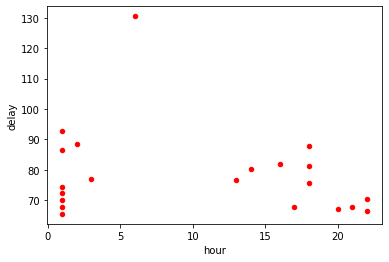

In [13]:
paris.plot(kind='scatter',x='hour',y='delay',color='red')
plt.show()

In [23]:
amsterdam = TA_df.loc[TA_df['source'] == 'Amsterdam']
len(amsterdam)

20

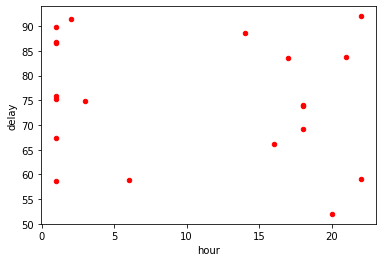

In [153]:
amsterdam.plot(kind='scatter',x='hour',y='delay',color='red')
plt.show()

In [154]:
frankfurt = TA_df.loc[TA_df['source'] == 'Frankfurt']

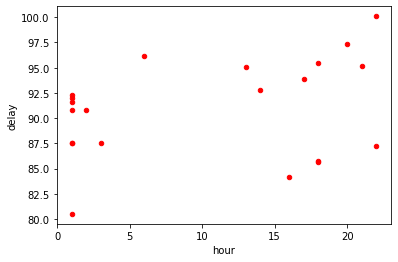

In [155]:
frankfurt.plot(kind='scatter',x='hour',y='delay',color='red')
plt.show()

In [156]:
print (paris)

    delay source                           org                      time  hour
20   65.5  Paris                      Bravatas  2020-04-14T01:29:06+0000     1
21   67.8  Paris             NTT America, Inc.  2020-04-14T01:34:31+0000     1
22   70.2  Paris            Hurricane Electric  2020-04-14T01:35:32+0000     1
23   72.5  Paris              Telia Company AB  2020-04-14T01:40:12+0000     1
24   92.8  Paris              Telia Company AB  2020-04-14T01:48:07+0000     1
25   86.6  Paris              Telia Company AB  2020-04-14T01:48:16+0000     1
26   88.5  Paris              Telia Company AB  2020-04-14T02:33:45+0000     2
27   76.5  Paris                      Bravatas  2020-04-14T13:55:46+0000    13
28   82.0  Paris                  Level 3, LLC  2020-04-14T16:23:17+0000    16
29   67.7  Paris             NTT America, Inc.  2020-04-14T17:49:32+0000    17
30   81.1  Paris              Telia Company AB  2020-04-14T18:03:48+0000    18
31   75.6  Paris              Telia Company AB  2020

In [157]:
print (frankfurt)

    delay     source                org                      time  hour
41   92.3  Frankfurt   Telia Company AB  2020-04-14T01:29:03+0000     1
42   92.0  Frankfurt   Telia Company AB  2020-04-14T01:34:28+0000     1
43   80.5  Frankfurt  NTT America, Inc.  2020-04-14T01:35:28+0000     1
44   87.5  Frankfurt   Telia Company AB  2020-04-14T01:40:09+0000     1
45   90.8  Frankfurt   Telia Company AB  2020-04-14T01:48:04+0000     1
46   87.5  Frankfurt   Telia Company AB  2020-04-14T01:48:13+0000     1
47   90.8  Frankfurt   Telia Company AB  2020-04-14T02:33:42+0000     2
48   95.1  Frankfurt   Telia Company AB  2020-04-14T13:55:43+0000    13
49   84.2  Frankfurt  NTT America, Inc.  2020-04-14T16:23:14+0000    16
50   93.9  Frankfurt   Telia Company AB  2020-04-14T17:49:29+0000    17
51   85.6  Frankfurt   Telia Company AB  2020-04-14T18:03:45+0000    18
52   85.7  Frankfurt   Telia Company AB  2020-04-14T18:21:56+0000    18
53   95.5  Frankfurt   Telia Company AB  2020-04-14T18:50:45+000

In [158]:
print (amsterdam)

    delay     source                       org                      time  hour
0    75.2  Amsterdam  Tata Communications Ltd.  2020-04-14T01:29:06+0000     1
1    89.8  Amsterdam          Telia Company AB  2020-04-14T01:34:32+0000     1
2    58.6  Amsterdam        Hurricane Electric  2020-04-14T01:35:33+0000     1
3    75.9  Amsterdam            Zayo Bandwidth  2020-04-14T01:40:13+0000     1
4    67.4  Amsterdam    Hurricane Electric LLC  2020-04-14T01:48:08+0000     1
5    86.6  Amsterdam          Telia Company AB  2020-04-14T01:48:17+0000     1
6    91.5  Amsterdam          Telia Company AB  2020-04-14T02:33:46+0000     2
7    66.1  Amsterdam    Hurricane Electric LLC  2020-04-14T16:23:18+0000    16
8    83.5  Amsterdam          Telia Company AB  2020-04-14T17:49:33+0000    17
9    73.9  Amsterdam          Telia Company AB  2020-04-14T18:03:49+0000    18
10   74.1  Amsterdam          Telia Company AB  2020-04-14T18:22:00+0000    18
11   69.1  Amsterdam  Tata Communications Ltd.  2020

In [9]:
TA_df = pd.read_csv('TA_df.csv')

In [202]:
city_dict = {}
for num, city in enumerate(list(set(TA_df['source']))):
    city_dict[city] = num
TA_df['source_num'] = TA_df['source'].apply(lambda source : city_dict[source])

In [252]:
city_dict

{'Amsterdam': 0, 'Paris': 1, 'Frankfurt': 2}

/home/liampeng/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/liampeng/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/liampeng/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/liampeng/anaconda3/lib/python3.6/site-packages/pandas/plotting

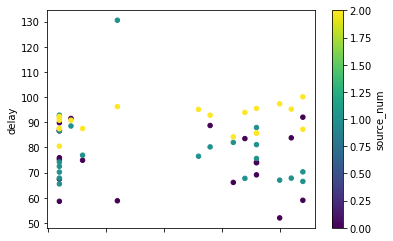

In [16]:
delay_time = TA_df.plot.scatter(x='hour',
                      y='delay',
                      c='source_num',
                      colormap='viridis').get_figure()
delay_time.savefig('delay_time.pdf')

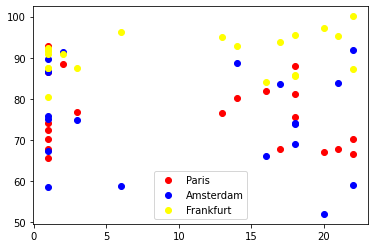

In [62]:
paris = TA_df.loc[(TA_df['source'] == 'Paris') & (TA_df['time'] != '2020-04-15T06:58:46+0000')]
amsterdam = TA_df.loc[TA_df['source'] == 'Amsterdam']
frankfurt = TA_df.loc[TA_df['source'] == 'Frankfurt']
plt.scatter(x=paris['hour'],y=paris['delay'], label='Paris', color='red', marker="o")
plt.scatter(x=amsterdam['hour'],y=amsterdam['delay'], label='Amsterdam', color='blue', marker="o")
plt.scatter(x=frankfurt['hour'],y=frankfurt['delay'], label='Frankfurt', color='yellow', marker="o")
plt.legend()
plt.show()

In [186]:
set(TA_df['org'])

{'Bravatas',
 'Hurricane Electric',
 'Level 3',
 'Level 3,',
 'NTT America,',
 'Tata Communications',
 'Telia Company',
 'Zayo Bandwidth',
 nan}

In [183]:
def org_name(org):
    if pd.isna(org):
        return org
    x = org.split()
    if len(x) <= 2:
        return org
    newOrg = ' '.join(x[:2])
    return newOrg

In [184]:
TA_df['org'] = TA_df['org'].apply(org_name)

In [188]:
TA_df['org'] = TA_df['org'].apply(lambda org : org if pd.isna(org) else org.replace(',',''))

In [255]:
TA_df.to_csv('TA_df.csv')

In [235]:
list(set(TA_df['org']))

['Zayo Bandwidth',
 'Telia Company',
 'NTT America',
 'Tata Communications',
 'Level 3',
 'Unknown',
 'Bravatas',
 'Hurricane Electric']

In [236]:
TA_df['org'] = TA_df['org'].fillna('Unknown')

In [242]:
org_dict = {}
i = 0
for org in list(set(TA_df['org'])):
    org_dict[org] = i
    i += 1

In [243]:
org_dict

{'Zayo Bandwidth': 0,
 'Telia Company': 1,
 'NTT America': 2,
 'Tata Communications': 3,
 'Level 3': 4,
 'Unknown': 5,
 'Bravatas': 6,
 'Hurricane Electric': 7}

In [244]:
TA_df['org_num'] = TA_df['org'].apply(lambda org : org_dict[org])

/home/liampeng/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/liampeng/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/liampeng/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/liampeng/anaconda3/lib/python3.6/site-packages/pandas/plotting

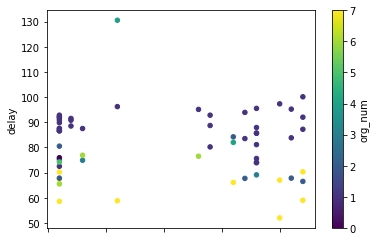

In [246]:
TA_df.plot.scatter(x='hour',
                      y='delay',
                      c='org_num',
                      colormap='viridis')

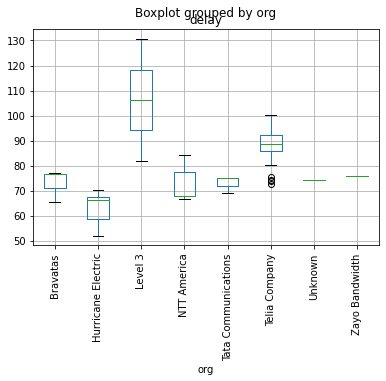

In [266]:
delay_org = TA_df.boxplot(column=['delay'],by='org', rot=90).get_figure()
delay_org.savefig('delay_org.pdf')

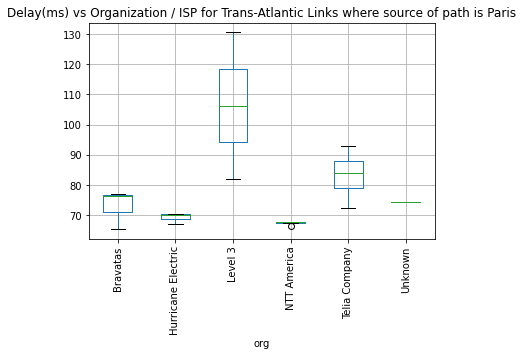

In [19]:
TA_df.loc[TA_df['source'] == 'Paris'].boxplot(column=['delay'],by='org', rot=90).get_figure()
plt.title("Delay(ms) vs Organization / ISP for Trans-Atlantic Links where source of path is Paris")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.xlabel = "Organization / ISP"
plt.ylabel = "Delay (ms)"
plt.show()

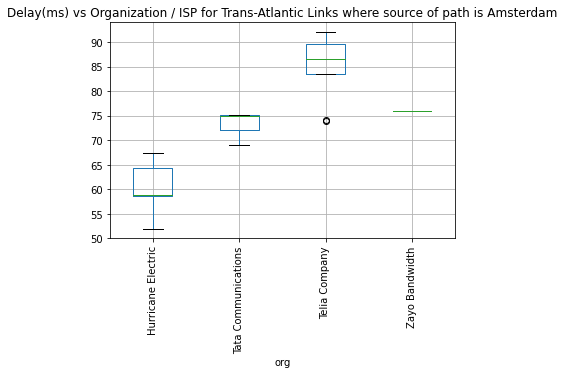

In [21]:
TA_df.loc[TA_df['source'] == 'Amsterdam'].boxplot(column=['delay'],by='org', rot=90).get_figure()
plt.title("Delay(ms) vs Organization / ISP for Trans-Atlantic Links where source of path is Amsterdam")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.xlabel = "Organization / ISP"
plt.ylabel = "Delay (ms)"
plt.show()

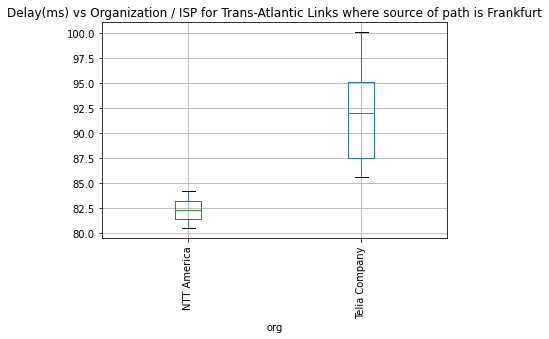

In [20]:
TA_df.loc[TA_df['source'] == 'Frankfurt'].boxplot(column=['delay'],by='org', rot=90).get_figure()
plt.title("Delay(ms) vs Organization / ISP for Trans-Atlantic Links where source of path is Frankfurt")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.xlabel = "Organization / ISP"
plt.ylabel = "Delay (ms)"
plt.show()

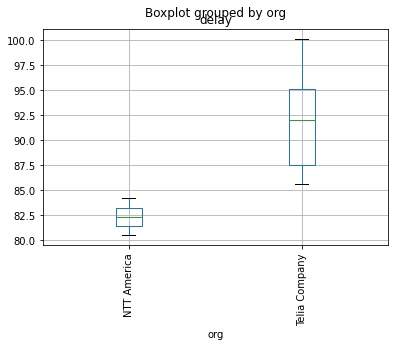

In [69]:
Frankfurt_org_delay = TA_df.loc[TA_df['source'] == 'Frankfurt'].boxplot(column=['delay'],by='org', rot=90).get_figure()
Frankfurt_org_delay.savefig('Frankfurt_org_delay.pdf')

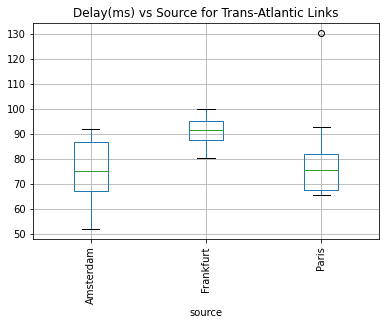

In [22]:
TA_df.boxplot(column=['delay'],by='source', rot=90).get_figure()
plt.title("Delay(ms) vs Source for Trans-Atlantic Links")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.xlabel = "Source"
plt.ylabel = "Delay (ms)"
plt.show()

In [27]:
TA_df['org'].value_counts()

Telia Company          37
Hurricane Electric      9
NTT America             6
Bravatas                3
Tata Communications     3
Level 3                 2
Unknown                 1
Zayo Bandwidth          1
Name: org, dtype: int64

In [ ]:
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

In [41]:
TA_df.plot.scatter(x='hour',
                      y='delay',
                      c='org_num',
                      colormap='viridis')

In [24]:
len(combined_df)

3875

In [26]:
len(combined_df.loc[combined_df['IP'] == '???'])

861

In [28]:
len(combined_df.loc[combined_df['IP'] == '???']) / len(combined_df)

0.22219354838709676

In [29]:
combined_df.columns

Index(['Unnamed: 0', 'IP', 'Loss', 'Snt', 'Last', 'Avg', 'Best', 'Wrst',
       'StDev', 'time', 'hop', 'source', 'route_number', 'email', 'IP_ISP',
       'zip_code', 'time_zone', 'area', 'as', 'city', 'country', 'countryCode',
       'isp', 'lat', 'lon', 'org', 'region', 'regionName', 'status',
       'timezone', 'zip', 'message', 'asn', 'cont_code'],
      dtype='object')

In [32]:
len(combined_df.loc[(combined_df['IP'] != '???') & (combined_df['status'] == 'fail')])

264

In [34]:
len(combined_df.loc[(combined_df['IP'] != '???')])

3014

In [35]:
264 / 3014

0.08759124087591241

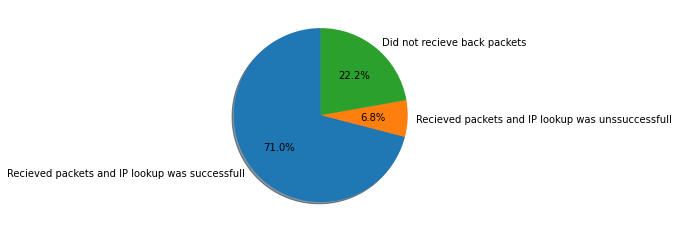

In [43]:
fig1, ax1 = plt.subplots()
ax1.pie([
    len(combined_df.loc[(combined_df['IP'] != '???') & (combined_df['status'] != 'fail')]),
    len(combined_df.loc[(combined_df['IP'] != '???') & (combined_df['status'] == 'fail')]),
    len(combined_df.loc[combined_df['IP'] == '???']),
], 
    labels=['Recieved packets and IP lookup was successfull',
            'Recieved packets and IP lookup was unssuccessfull',
            'Did not recieve back packets'],
    autopct='%1.1f%%',
    shadow=True, startangle=90
)
plt.show()